## 脑图皮层可视化
#### Chenfei Ye 2024-02-19

In [1]:
import os, shutil
import numpy as np
import pandas as pd
import nibabel as nib

# surface plot 
from neuromaps.datasets import fetch_fslr
from surfplot import Plot


/tmp/ipykernel_163636/3942298177.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# surface plot init for Schaefer atlas
# clone from https://github.com/ThomasYeoLab/CBIG/tree/master/stable_projects/brain_parcellation
CBIG_dir = '/data/cye_code/CBIG/' 
schaefer_cifti_path = os.path.join(CBIG_dir, 'Schaefer2018_LocalGlobal/Parcellations/HCP/fslr32k/cifti')

### 根据Schaefer图谱不同脑区粒度染色

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


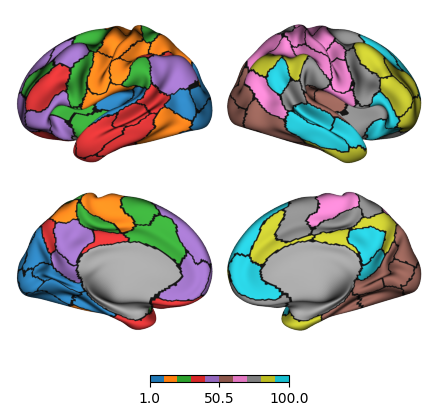

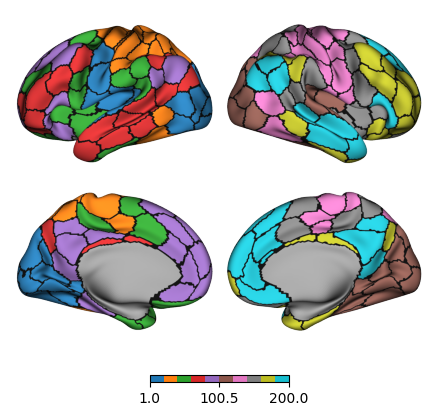

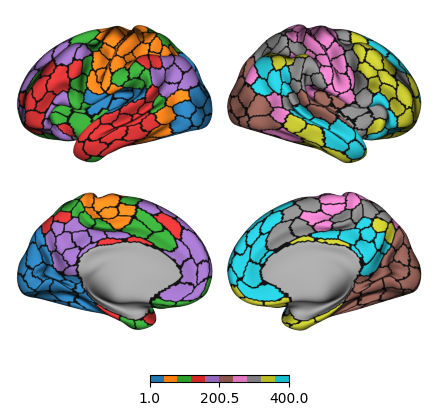

In [3]:
# plot Schaefer2018 atlas for 7 Networks
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']

# add Schaefer2018_100Parcels_7Networks atlas 
p = Plot(lh, rh)
atlas_cifti_path = os.path.join(schaefer_cifti_path, 'Schaefer2018_100Parcels_7Networks_order.dlabel.nii')
p.add_layer(atlas_cifti_path, cmap='tab10',cbar=True)
p.add_layer(atlas_cifti_path, cmap='gray',as_outline=True, cbar=False)
fig = p.build()
fig.show()


# add Schaefer2018_200Parcels_7Networks atlas 
p = Plot(lh, rh)
atlas_cifti_path = os.path.join(schaefer_cifti_path, 'Schaefer2018_200Parcels_7Networks_order.dlabel.nii')
p.add_layer(atlas_cifti_path, cmap='tab10',cbar=True)
p.add_layer(atlas_cifti_path, cmap='gray',as_outline=True, cbar=False)
fig = p.build()
fig.show()


# add Schaefer2018_400Parcels_7Networks atlas 
p = Plot(lh, rh)
atlas_cifti_path = os.path.join(schaefer_cifti_path, 'Schaefer2018_400Parcels_7Networks_order.dlabel.nii')
p.add_layer(atlas_cifti_path, cmap='tab10',cbar=True)
p.add_layer(atlas_cifti_path, cmap='gray',as_outline=True, cbar=False)
fig = p.build()
fig.show()

### 根据Yeo-7网络或Yeo-17网络的定义，基于不同脑区粒度重新染色

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


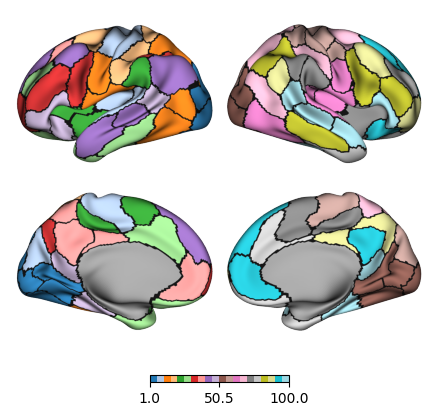

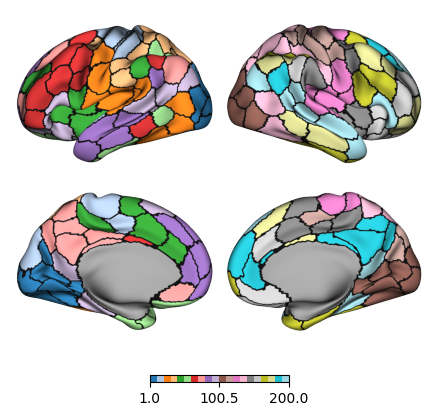

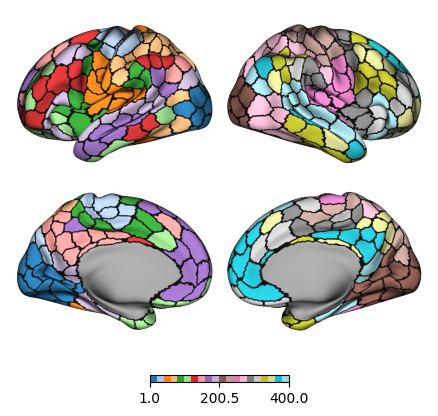

In [4]:
# plot Schaefer2018 atlas for 17 Networks
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']

# add Schaefer2018_100Parcels_17Networks atlas 
p = Plot(lh, rh)
atlas_cifti_path = os.path.join(schaefer_cifti_path, 'Schaefer2018_100Parcels_17Networks_order.dlabel.nii')
p.add_layer(atlas_cifti_path, cmap='tab20',cbar=True)
p.add_layer(atlas_cifti_path, cmap='gray',as_outline=True, cbar=False)
fig = p.build()
fig.show()


# add Schaefer2018_200Parcels_17Networks atlas 
p = Plot(lh, rh)
atlas_cifti_path = os.path.join(schaefer_cifti_path, 'Schaefer2018_200Parcels_17Networks_order.dlabel.nii')
p.add_layer(atlas_cifti_path, cmap='tab20',cbar=True)
p.add_layer(atlas_cifti_path, cmap='gray',as_outline=True, cbar=False)
fig = p.build()
fig.show()

# add Schaefer2018_400Parcels_17Networks atlas 
p = Plot(lh, rh)
atlas_cifti_path = os.path.join(schaefer_cifti_path, 'Schaefer2018_400Parcels_17Networks_order.dlabel.nii')
p.add_layer(atlas_cifti_path, cmap='tab20',cbar=True)
p.add_layer(atlas_cifti_path, cmap='gray',as_outline=True, cbar=False)
fig = p.build()
fig.show()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


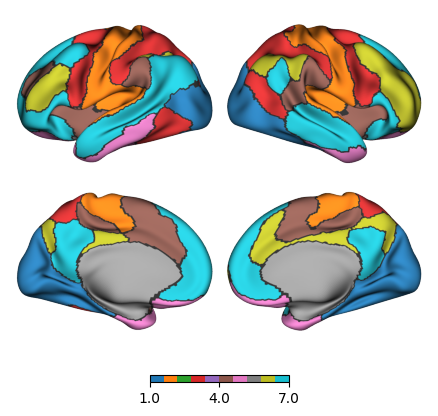

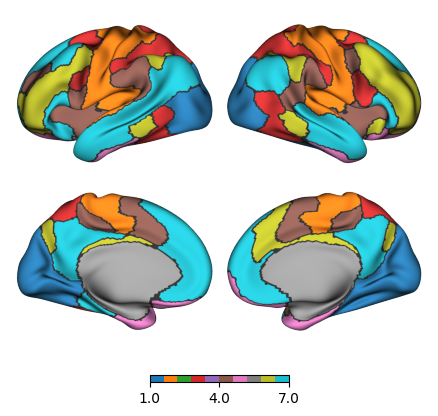

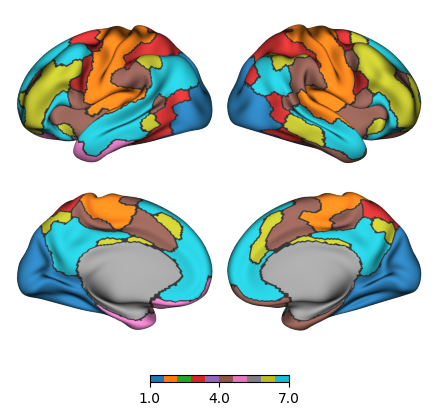

In [5]:
# plot Yeo-7 Networks
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']

# add Schaefer2018_100Parcels_7Networks atlas 
schaefer_csv = pd.read_csv('/data/cye_code/BIDS-fmripost/atlases/schaefer100x7_MNI.csv')
schaefer_yeo = schaefer_csv['ICN'].unique()
schaefer_yeo_df = pd.DataFrame(schaefer_yeo,columns=['ICN'])
schaefer_yeo_df.reset_index(inplace=True)
schaefer_yeo_df.loc[:,"intensity"]=schaefer_yeo_df["index"]+1

atlas_cifti_path = os.path.join(schaefer_cifti_path, 'Schaefer2018_100Parcels_7Networks_order.dlabel.nii')
atlas_cifti = nib.load(atlas_cifti_path)
atlas_cifti_data = atlas_cifti.get_fdata(dtype=np.float32)
atlas_cifti_data_flat = np.squeeze(atlas_cifti_data)

Yeo = atlas_cifti_data_flat.copy()
for i in range(0, 100):
        np.place(Yeo, atlas_cifti_data_flat == i+1, 
                 schaefer_yeo_df.loc[schaefer_yeo_df['ICN'] == schaefer_csv.loc[i,'ICN']]['intensity'])
p = Plot(lh, rh)
p.add_layer(Yeo, cmap='tab10',cbar=True)
p.add_layer(Yeo, cmap='gray',as_outline=True, cbar=False)
fig = p.build()
fig.show()

# add Schaefer2018_200Parcels_7Networks atlas 
schaefer_csv = pd.read_csv('/data/cye_code/BIDS-fmripost/atlases/schaefer200x7_MNI.csv')
schaefer_yeo = schaefer_csv['ICN'].unique()
schaefer_yeo_df = pd.DataFrame(schaefer_yeo,columns=['ICN'])
schaefer_yeo_df.reset_index(inplace=True)
schaefer_yeo_df.loc[:,"intensity"]=schaefer_yeo_df["index"]+1

atlas_cifti_path = os.path.join(schaefer_cifti_path, 'Schaefer2018_200Parcels_7Networks_order.dlabel.nii')
atlas_cifti = nib.load(atlas_cifti_path)
atlas_cifti_data = atlas_cifti.get_fdata(dtype=np.float32)
atlas_cifti_data_flat = np.squeeze(atlas_cifti_data)

Yeo = atlas_cifti_data_flat.copy()
for i in range(0, 200):
        np.place(Yeo, atlas_cifti_data_flat == i+1, 
                 schaefer_yeo_df.loc[schaefer_yeo_df['ICN'] == schaefer_csv.loc[i,'ICN']]['intensity'])
p = Plot(lh, rh)
p.add_layer(Yeo, cmap='tab10',cbar=True)
p.add_layer(Yeo, cmap='gray',as_outline=True, cbar=False)
fig = p.build()
fig.show()

# add Schaefer2018_400Parcels_7Networks atlas 
schaefer_csv = pd.read_csv('/data/cye_code/BIDS-fmripost/atlases/schaefer400x7_MNI.csv')
schaefer_yeo = schaefer_csv['ICN'].unique()
schaefer_yeo_df = pd.DataFrame(schaefer_yeo,columns=['ICN'])
schaefer_yeo_df.reset_index(inplace=True)
schaefer_yeo_df.loc[:,"intensity"]=schaefer_yeo_df["index"]+1

atlas_cifti_path = os.path.join(schaefer_cifti_path, 'Schaefer2018_400Parcels_7Networks_order.dlabel.nii')
atlas_cifti = nib.load(atlas_cifti_path)
atlas_cifti_data = atlas_cifti.get_fdata(dtype=np.float32)
atlas_cifti_data_flat = np.squeeze(atlas_cifti_data)

Yeo = atlas_cifti_data_flat.copy()
for i in range(0, 400):
        np.place(Yeo, atlas_cifti_data_flat == i+1, 
                 schaefer_yeo_df.loc[schaefer_yeo_df['ICN'] == schaefer_csv.loc[i,'ICN']]['intensity'])
p = Plot(lh, rh)
p.add_layer(Yeo, cmap='tab10',cbar=True)
p.add_layer(Yeo, cmap='gray',as_outline=True, cbar=False)
fig = p.build()
fig.show()

In [6]:
print('legend for networks')
schaefer_yeo_df

legend for networks


,index,ICN,intensity
0,0,Vis,1
1,1,SomMot,2
2,2,DorsAttn,3
3,3,SalVentAttn,4
4,4,Limbic,5
5,5,Cont,6
6,6,Default,7


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


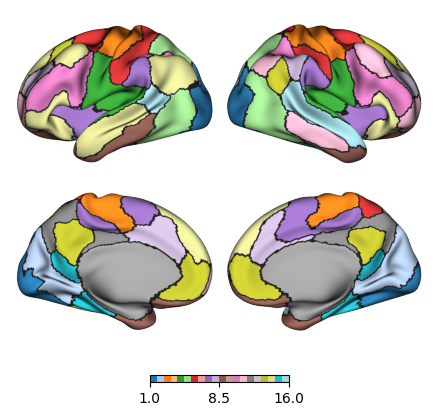

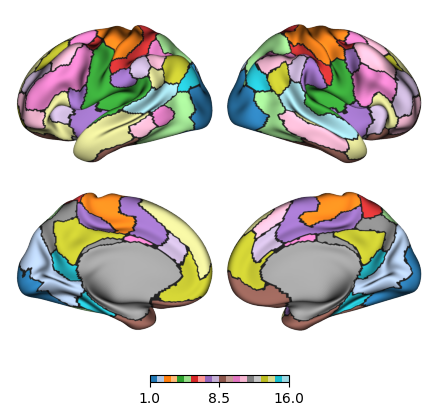

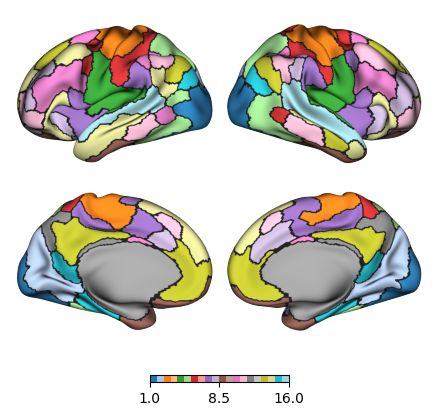

In [7]:
# plot Yeo-17 Networks
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']

# add Schaefer2018_100Parcels_17Networks atlas 
schaefer_csv = pd.read_csv('/data/cye_code/BIDS-fmripost/atlases/schaefer100x17_MNI.csv')
schaefer_yeo = schaefer_csv['ICN'].unique()
schaefer_yeo_df = pd.DataFrame(schaefer_yeo,columns=['ICN'])
schaefer_yeo_df.reset_index(inplace=True)
schaefer_yeo_df.loc[:,"intensity"]=schaefer_yeo_df["index"]+1

atlas_cifti_path = os.path.join(schaefer_cifti_path, 'Schaefer2018_100Parcels_17Networks_order.dlabel.nii')
atlas_cifti = nib.load(atlas_cifti_path)
atlas_cifti_data = atlas_cifti.get_fdata(dtype=np.float32)
atlas_cifti_data_flat = np.squeeze(atlas_cifti_data)

Yeo = atlas_cifti_data_flat.copy()
for i in range(0, 100):
        np.place(Yeo, atlas_cifti_data_flat == i+1, 
                 schaefer_yeo_df.loc[schaefer_yeo_df['ICN'] == schaefer_csv.loc[i,'ICN']]['intensity'])
p = Plot(lh, rh)
p.add_layer(Yeo, cmap='tab20',cbar=True)
p.add_layer(Yeo, cmap='gray',as_outline=True, cbar=False)
fig = p.build()
fig.show()

# add Schaefer2018_200Parcels_17Networks atlas 
schaefer_csv = pd.read_csv('/data/cye_code/BIDS-fmripost/atlases/schaefer200x17_MNI.csv')
schaefer_yeo = schaefer_csv['ICN'].unique()
schaefer_yeo_df = pd.DataFrame(schaefer_yeo,columns=['ICN'])
schaefer_yeo_df.reset_index(inplace=True)
schaefer_yeo_df.loc[:,"intensity"]=schaefer_yeo_df["index"]+1

atlas_cifti_path = os.path.join(schaefer_cifti_path, 'Schaefer2018_200Parcels_17Networks_order.dlabel.nii')
atlas_cifti = nib.load(atlas_cifti_path)
atlas_cifti_data = atlas_cifti.get_fdata(dtype=np.float32)
atlas_cifti_data_flat = np.squeeze(atlas_cifti_data)

Yeo = atlas_cifti_data_flat.copy()
for i in range(0, 200):
        np.place(Yeo, atlas_cifti_data_flat == i+1, 
                 schaefer_yeo_df.loc[schaefer_yeo_df['ICN'] == schaefer_csv.loc[i,'ICN']]['intensity'])
p = Plot(lh, rh)
p.add_layer(Yeo, cmap='tab20',cbar=True)
p.add_layer(Yeo, cmap='gray',as_outline=True, cbar=False)
fig = p.build()
fig.show()

# add Schaefer2018_400Parcels_17Networks atlas 
schaefer_csv = pd.read_csv('/data/cye_code/BIDS-fmripost/atlases/schaefer400x17_MNI.csv')
schaefer_yeo = schaefer_csv['ICN'].unique()
schaefer_yeo_df = pd.DataFrame(schaefer_yeo,columns=['ICN'])
schaefer_yeo_df.reset_index(inplace=True)
schaefer_yeo_df.loc[:,"intensity"]=schaefer_yeo_df["index"]+1

atlas_cifti_path = os.path.join(schaefer_cifti_path, 'Schaefer2018_400Parcels_17Networks_order.dlabel.nii')
atlas_cifti = nib.load(atlas_cifti_path)
atlas_cifti_data = atlas_cifti.get_fdata(dtype=np.float32)
atlas_cifti_data_flat = np.squeeze(atlas_cifti_data)

Yeo = atlas_cifti_data_flat.copy()
for i in range(0, 400):
        np.place(Yeo, atlas_cifti_data_flat == i+1, 
                 schaefer_yeo_df.loc[schaefer_yeo_df['ICN'] == schaefer_csv.loc[i,'ICN']]['intensity'])
p = Plot(lh, rh)
p.add_layer(Yeo, cmap='tab20',cbar=True)
p.add_layer(Yeo, cmap='gray',as_outline=True, cbar=False)
fig = p.build()
fig.show()


In [8]:
print('legend for networks')
schaefer_yeo_df
# 注意Yeo-17网络的定义只存在于高粒度分区（如Schaefer1000，此时Limbic拆分为LimbicA和LimbicB两个网络）,低粒度图谱实际只有16个网络

legend for networks


,index,ICN,intensity
0,0,VisCent,1
1,1,VisPeri,2
2,2,SomMotA,3
3,3,SomMotB,4
4,4,DorsAttnA,5
5,5,DorsAttnB,6
6,6,SalVentAttnA,7
7,7,SalVentAttnB,8
8,8,Limbic,9
9,9,ContA,10


### neuromap公开数据可视化

In [9]:
from neuromaps import datasets
annotations = datasets.available_annotations()
annotations

[('abagen', 'genepc1', 'fsaverage', '10k'),
 ('aghourian2017', 'feobv', 'MNI152', '1mm'),
 ('alarkurtti2015', 'raclopride', 'MNI152', '3mm'),
 ('bedard2019', 'feobv', 'MNI152', '1mm'),
 ('beliveau2017', 'az10419369', 'MNI152', '1mm'),
 ('beliveau2017', 'az10419369', 'fsaverage', '164k'),
 ('beliveau2017', 'cimbi36', 'MNI152', '1mm'),
 ('beliveau2017', 'cimbi36', 'fsaverage', '164k'),
 ('beliveau2017', 'cumi101', 'MNI152', '1mm'),
 ('beliveau2017', 'cumi101', 'fsaverage', '164k'),
 ('beliveau2017', 'dasb', 'MNI152', '1mm'),
 ('beliveau2017', 'dasb', 'fsaverage', '164k'),
 ('beliveau2017', 'sb207145', 'MNI152', '1mm'),
 ('beliveau2017', 'sb207145', 'fsaverage', '164k'),
 ('ding2010', 'mrb', 'MNI152', '1mm'),
 ('dubois2015', 'abp688', 'MNI152', '1mm'),
 ('dukart2018', 'flumazenil', 'MNI152', '3mm'),
 ('dukart2018', 'fpcit', 'MNI152', '3mm'),
 ('fazio2016', 'madam', 'MNI152', '3mm'),
 ('finnema2016', 'ucbj', 'MNI152', '1mm'),
 ('gallezot2010', 'p943', 'MNI152', '1mm'),
 ('gallezot2017', 'g

In [10]:
tags = datasets.available_tags()
print(tags)

['ASL', 'MEG', 'MRI', 'PET', 'fMRI', 'functional', 'genetics', 'meta-analysis', 'metabolism', 'receptors', 'structural']


In [11]:
fmri_annotations = datasets.available_annotations(tags='receptors')
print(fmri_annotations)

[('aghourian2017', 'feobv', 'MNI152', '1mm'), ('alarkurtti2015', 'raclopride', 'MNI152', '3mm'), ('bedard2019', 'feobv', 'MNI152', '1mm'), ('beliveau2017', 'az10419369', 'MNI152', '1mm'), ('beliveau2017', 'az10419369', 'fsaverage', '164k'), ('beliveau2017', 'cimbi36', 'MNI152', '1mm'), ('beliveau2017', 'cimbi36', 'fsaverage', '164k'), ('beliveau2017', 'cumi101', 'MNI152', '1mm'), ('beliveau2017', 'cumi101', 'fsaverage', '164k'), ('beliveau2017', 'dasb', 'MNI152', '1mm'), ('beliveau2017', 'dasb', 'fsaverage', '164k'), ('beliveau2017', 'sb207145', 'MNI152', '1mm'), ('beliveau2017', 'sb207145', 'fsaverage', '164k'), ('ding2010', 'mrb', 'MNI152', '1mm'), ('dubois2015', 'abp688', 'MNI152', '1mm'), ('dukart2018', 'flumazenil', 'MNI152', '3mm'), ('dukart2018', 'fpcit', 'MNI152', '3mm'), ('fazio2016', 'madam', 'MNI152', '3mm'), ('gallezot2010', 'p943', 'MNI152', '1mm'), ('gallezot2017', 'gsk189254', 'MNI152', '1mm'), ('hesse2017', 'methylreboxetine', 'MNI152', '3mm'), ('hillmer2016', 'flubatin

In [12]:
fmri_annotations = datasets.available_annotations(tags='meta-analysis')
print(fmri_annotations)

[('neurosynth', 'cogpc1', 'MNI152', '2mm')]


In [13]:
fmri_annotations = datasets.available_annotations(tags='fMRI')
print(fmri_annotations)

[('margulies2016', 'fcgradient01', 'fsLR', '32k'), ('margulies2016', 'fcgradient02', 'fsLR', '32k'), ('margulies2016', 'fcgradient03', 'fsLR', '32k'), ('margulies2016', 'fcgradient04', 'fsLR', '32k'), ('margulies2016', 'fcgradient05', 'fsLR', '32k'), ('margulies2016', 'fcgradient06', 'fsLR', '32k'), ('margulies2016', 'fcgradient07', 'fsLR', '32k'), ('margulies2016', 'fcgradient08', 'fsLR', '32k'), ('margulies2016', 'fcgradient09', 'fsLR', '32k'), ('margulies2016', 'fcgradient10', 'fsLR', '32k'), ('mueller2013', 'intersubjvar', 'fsLR', '164k'), ('neurosynth', 'cogpc1', 'MNI152', '2mm')]


### 以Margulies在2016年PNAS发表的脑功能梯度文章中的主梯度作为脑图示例进行可视化

In [14]:
FC_grad1 = datasets.fetch_annotation(source='margulies2016', desc='fcgradient01',
                                       space='fsLR', den='32k')


In [15]:
FC_grad1

['/root/neuromaps-data/annotations/margulies2016/fcgradient01/fsLR/source-margulies2016_desc-fcgradient01_space-fsLR_den-32k_hemi-L_feature.func.gii',
 '/root/neuromaps-data/annotations/margulies2016/fcgradient01/fsLR/source-margulies2016_desc-fcgradient01_space-fsLR_den-32k_hemi-R_feature.func.gii']

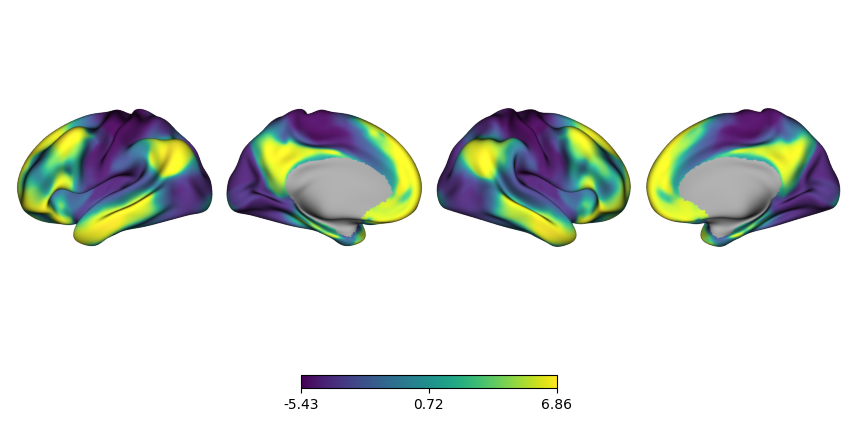

In [16]:
# e.g. plot FC gradient #1
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
p = Plot(lh, rh, layout =  'row', size =  (1000, 400), zoom = 1.2)
p.add_layer({'left': FC_grad1[0], 'right': FC_grad1[1]}, cbar=True)
fig = p.build()
fig.show()

### 针对某脑图，进行脑区分割求脑区平均值，并重新染色

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


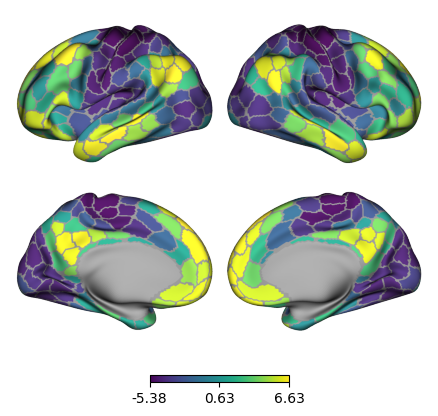

In [17]:
from neuromaps.parcellate import Parcellater
from neuromaps.images import dlabel_to_gifti
atlas_cifti_path = os.path.join(schaefer_cifti_path, 'Schaefer2018_400Parcels_17Networks_order.dlabel.nii')
parc = Parcellater(dlabel_to_gifti(atlas_cifti_path), 'fsLR')
fc_grad_parc = parc.fit_transform(FC_grad1, 'fsLR')
fc_grad_parc.shape

atlas_cifti = nib.load(atlas_cifti_path)
atlas_cifti_data = atlas_cifti.get_fdata(dtype=np.float32)
atlas_cifti_data_flat = np.squeeze(atlas_cifti_data)

BrainMap = atlas_cifti_data_flat.copy()
for i in range(0, 400):
        np.place(BrainMap, atlas_cifti_data_flat == i+1, fc_grad_parc[i])
p = Plot(lh, rh)
p.add_layer(BrainMap, cbar=True)
p.add_layer(BrainMap, cmap='gray',as_outline=True, cbar=False)
fig = p.build()
fig.show()

### 对MNI152空间的NIFTI数据，在空间转换后进行可视化

In [21]:
from neuromaps.datasets import fetch_annotation
from neuromaps import transforms
neurosynth = fetch_annotation(source='neurosynth')
neurosynth

Downloaded 1769472 of 1817390 bytes (97.4%,    0.2s remaining) ...done. (11 seconds, 0 min)


'/root/neuromaps-data/annotations/neurosynth/cogpc1/MNI152/source-neurosynth_desc-cogpc1_space-MNI152_res-2mm_feature.nii.gz'

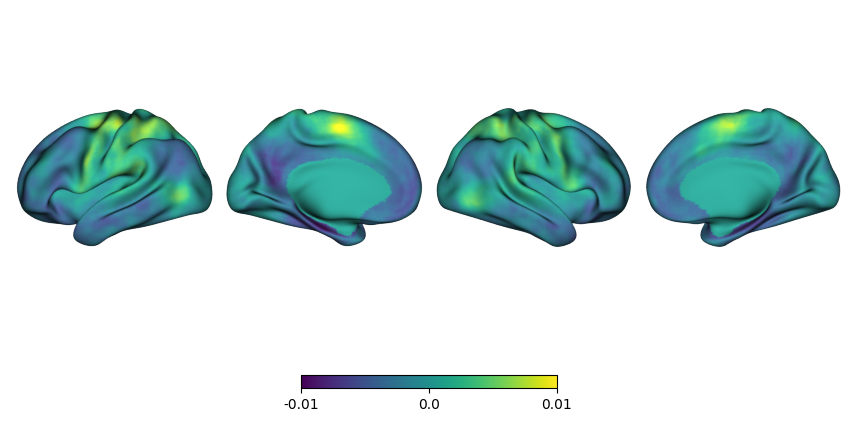

In [26]:
fslr = transforms.mni152_to_fslr(neurosynth, '32k')
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
p = Plot(lh, rh, layout =  'row', size =  (1000, 400), zoom = 1.2)
p.add_layer({'left': fslr[0], 'right': fslr[1]}, cbar=True)
fig = p.build()
fig.show()